<h1>Detekcija srčanih bolesti</h1>

U sklopu predmeta "Uvod u znanost o podacima" napravio sam model za detekciju srčanih bolesti.
Rad se temelji na objavljenom istraživanju: "Implementation of Machine Learning Model to Predict Heart Failure Disease, u sklopu članka - "(IJACSA) International Journal of Advanced Computer Science and Applications, Vol. 10, No. 6, 2019"

Prema istraživanju kardiovaskularne bolesti su jedne od najčešćih bolesti koje mogu utjecati na zdravlje ljudi. Svake godine 26 milijona ljudi je pod utjecajem srčanih bolesti među kojima neki od njih rezultiraju zastojem srca.

Osobe koje su pod velikim kardiovaskularnim rizikom zbog prisutnosti određenih pojava poput hipertenzije, dijabetesa i ostalih povezanih simptoma bi trebali preventivno detektirati mogućnost realizacije rizika te u tom kontekstu modeli strojnog učenja mogu biti od velike pomoći.



<h2>Deskriptivna i istraživačka analiza podataka</h2>

Liječnički podaci i istraživanja ukazuju kako na kardiovaskularno zdravlje najviše utječu životne navike; od nezdrave hrane i pušenja do fizičke aktivnosti te stresa.
Kako bi se replicirali podaci istraživanja, na raspolaganju imamo "heart_disease_uci" skup podataka s primjerima, atributima te oznakama srčanih bolesti.

Idemo se upoznati sa skupom podataka, no prije toga moramo učitati sve potrebne biblioteke i okvire.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



<h3> Učitavanje podataka</h3>

Idemo učitati podatke kako bismo replicirali rezultate istraživanja. Podatke učitavamo u dataframe object X.

In [4]:
X = pd.read_csv("heart_disease_uci.csv", index_col = 0)
print(X.shape)
X.head()


(920, 15)


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Vidimo da tablica ima 920 primjera s 15 atributa među kojima je "num" ciljna oznaka.

Pojašnjenja značajki:
 - num - ciljana značajka - ciljna oznaka koja govori o razini srčanih bolesti [0, 1, 2, 3, 4]
 - thal - "Thallium test" - kategoričke vrijednosti boli u prsima ili poteškoća s disanjem [fixed defect, normal blood flow, reversible defect]
 - ca - status fluoroskopije (Coronary Angiography) - vrsta medicinskog slikanja koja pokazuje koliko arterija prilikom procedure "farbanja" opsrkbljuju srce krvlju. [0.0, 1.0, 2.0, 3.0]
 - slope - kategorička varijabla koja na temelju ECG mjerenja pokazuje srčano stanje pacijenta za vrijeme fizičke aktivnosti [downsloping, flat, upsloping]
 - oldpeak - ST dio elektrokardijagrama (EEG) koji ukazuje ima li smanjenja dotoka krvi u srce za vrijeme fizičke aktivnosti [0 < x < 6.2]
 - exang - bol u prsima (angina) koja je nastala kao posljedica fizičke aktivnosti (True ako je, false ako nije)
 - thalch - maksimalni broj otkucaja srca koji je izbrojan kod pacijenta prilikom primanja
 - restecg - kategorička varijabla koja pokazuje rezultat srčanih abnormalija uz pomoć EKG-a za vrijeme mirovanja
 - fbs - razina šećera u krvi nakon prespavane noći na praznom želudcu. Ako je razina veća od 120mg/dl vrijednost je True, što sugerira hiperglikemiju (znak za dijabetes), inače False
 - chol - mjerenje kolesterola za vrijeme primanja pacijenta u bolnicu
 - trestbps - mjerenje krvnog tlaka za vrijeme primanja pacijenta u bolnicu
 - cp - kategorička varijabla koja gleda razinu inteziteta boli u prsima (angine) za vrijeme primanja pacijenta u bolnicu [asymptomatic, atypical angina, non-anginal pain, typical angina]
 - sex - spol pacijenta [Male, Female]
 - age - godina pacijenta


Dataset atribut označava mjesto od kuda su pacijenti primljeni u bolnicu. Autor je  u istraživačkom radu koristio isključivo podskup podataka iz Cleveland dataseta, stoga ćemo i mi u svrhu repliciranja rezultata istraživanja koristiti primjere koji dolaze iz Clevelanda.

C:\Users\Zoran Barac\AppData\Local\Temp\ipykernel_3108\927206251.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(dataset_names))


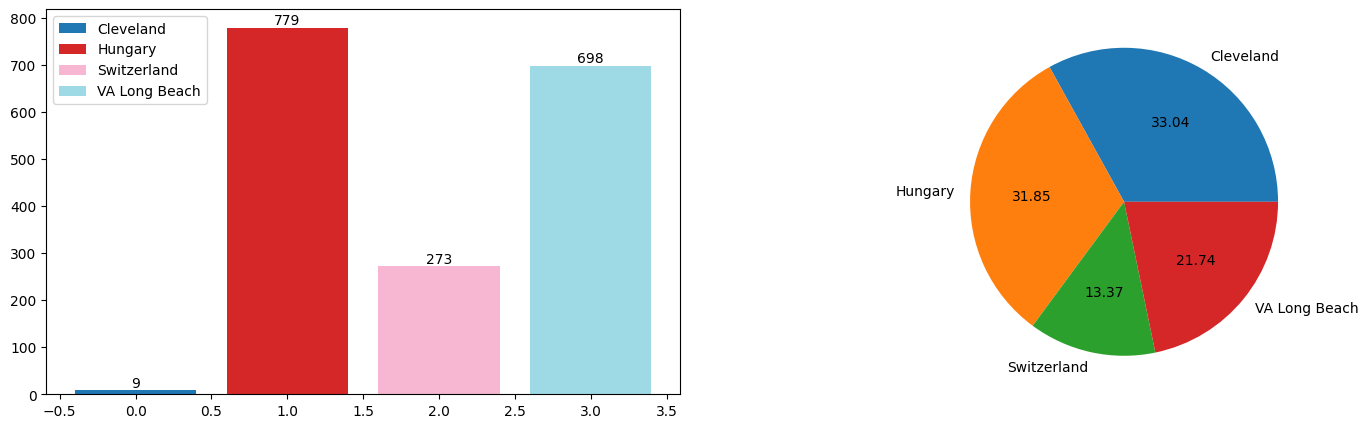

In [5]:
from matplotlib.cm import get_cmap

dataset_names = X.groupby("dataset").count().index.values
atirbute_names = X.columns
missing_values = []

cmap = get_cmap('tab20', len(dataset_names))

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

x_values = list(range(len(dataset_names)))

for i, name in enumerate(dataset_names):
    missing_value = X[X['dataset'] == name].isna().sum().sum()
    missing_values.append(missing_value)

bars = ax[0].bar(x_values, missing_values, color=cmap(np.arange(len(dataset_names))))

ax[0].legend(bars, dataset_names)

for x, y in zip(x_values, missing_values):
    ax[0].text(x, y, str(y), ha='center', va='bottom')

count_per_dataset = X.groupby('dataset').count().loc[:, 'age'].values
percent = (count_per_dataset / len(X)) * 100
ax[1].pie(percent, labels=dataset_names, autopct='%.2f')

plt.show()

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")






Iz ova dva grafa možemo saznati zašto je autor koristio Cleveland podskup podataka. Prvi razlog je taj što ima najmanje nedostajućih vrijednosti, njih 9 u odnosu na primjer 779 Mađarskih. 

Uz to, Cleveland je najveći podskup i čini 33% cijelog dataseta. Iz ta dva razloga koristit ćemo Cleveland za daljnju analizu.

In [6]:
X[X['dataset'] == 'Cleveland'].info()


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 1 to 304
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       304 non-null    int64  
 1   sex       304 non-null    object 
 2   dataset   304 non-null    object 
 3   cp        304 non-null    object 
 4   trestbps  304 non-null    float64
 5   chol      304 non-null    float64
 6   fbs       304 non-null    object 
 7   restecg   304 non-null    object 
 8   thalch    304 non-null    float64
 9   exang     304 non-null    object 
 10  oldpeak   304 non-null    float64
 11  slope     303 non-null    object 
 12  ca        299 non-null    float64
 13  thal      301 non-null    object 
 14  num       304 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 38.0+ KB


Iz ovoga možemo vidjeti koji su atributi binarne i kategoričke varijable kao i numeričke. 
Možemo primjetiti sljedeće:

- Nedostaju mjerenja sljedećih 3 atributa: slope, ca, thal

Kako bismo bolje uočili anomalije u podacima te ih pripremili za modele, odradit ćemo čišćenje i vizualizaciju.


<h3>Vizualizacija podataka</h3>

<h4>Odnosi između numeričkih atributa<h4>

Idemo vidjeti kakvi su međusobno odnosi između atributa. Vizualizacija nam može pomoći u boljem razumijevanju skupa podataka te pronalasku nedostajučih i stršećih vrijednosti.

Napravit ćemo sljedeće; obzirom da imamo kategoričke varijable, uz pomoć LabelEncodera ćemo ih pretvoriti u numeričke. Na taj način ćemo moći vidjeti kakva je korelacija između varijabli.

In [7]:
from sklearn.preprocessing import LabelEncoder

X_label_encoded = X.copy()  
X_label_encoded = X_label_encoded[X_label_encoded["dataset"] == "Cleveland"]
X_label_encoded = X_label_encoded.drop(columns=["dataset"]) 
object_columns = X_label_encoded.select_dtypes("object").columns.values

le = LabelEncoder()

for feature in object_columns:
    X_label_encoded[feature] = le.fit_transform(X_label_encoded[feature])


Ono što ćemo u međukoraku napraviti jest označiti sve "num" vrijednosti koje su veće od 1 kao 1. Razlog je taj što 0 označava zdravog pacijenta, a bilo koji broj veći od 1 bolesnog.
Kako bismo imali preglednije rezultate, te vrijednosti ćemo smatrati kao loše stanje.

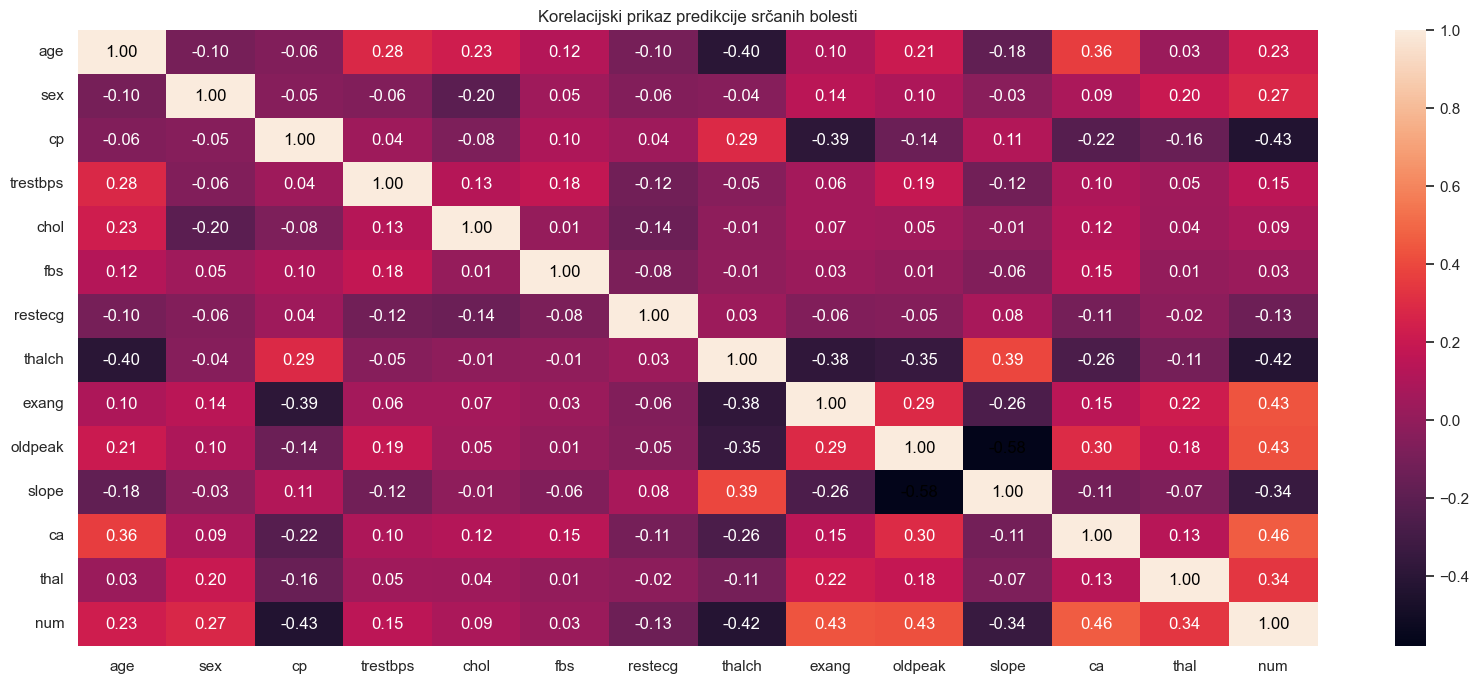

In [8]:

X_label_encoded.loc[X_label_encoded["num"] > 0, "num"] = 1

correlation_matrix = X_label_encoded.corr()
sns.set(rc={'figure.figsize':(20,8)})

sns.heatmap(correlation_matrix, annot=False)

def get_text_color(value, threshold=0.5):
    if abs(value) > threshold:
        return 'black'
    else:
        return 'white'

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        text_color = get_text_color(value)
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color)
        
plt.title("Korelacijski prikaz predikcije srčanih bolesti")
plt.show()

Korelacija je mjera jakosti linearne veze između dviju varijabli. U našem slučaju, predikcija srčanih bolesti, num atribut, ima srednje pozitivnu linearnu vezu s koronarnom angiografijom (ca) čiji je koeficijent korelacije 0.46 te s oldpeak-om gdje je koeficijent 0.39. To su ujedno najveći koeficijenti korelaciji među svim atributima.
Također, srčane bolesti imaju srednje jaku negativnu korelaciju s thalch atributom kao i cp-om.

Možemo primjetiti da ne postoji ikakva korelacija s atributom fbs u odnosu na ciljnu varijablu.

<h4>Odnosi između kategoričkih atributa<h4>

In [9]:
X.loc[X["num"] > 0, "num"] = 1
object_columns = X.select_dtypes("object").columns.values

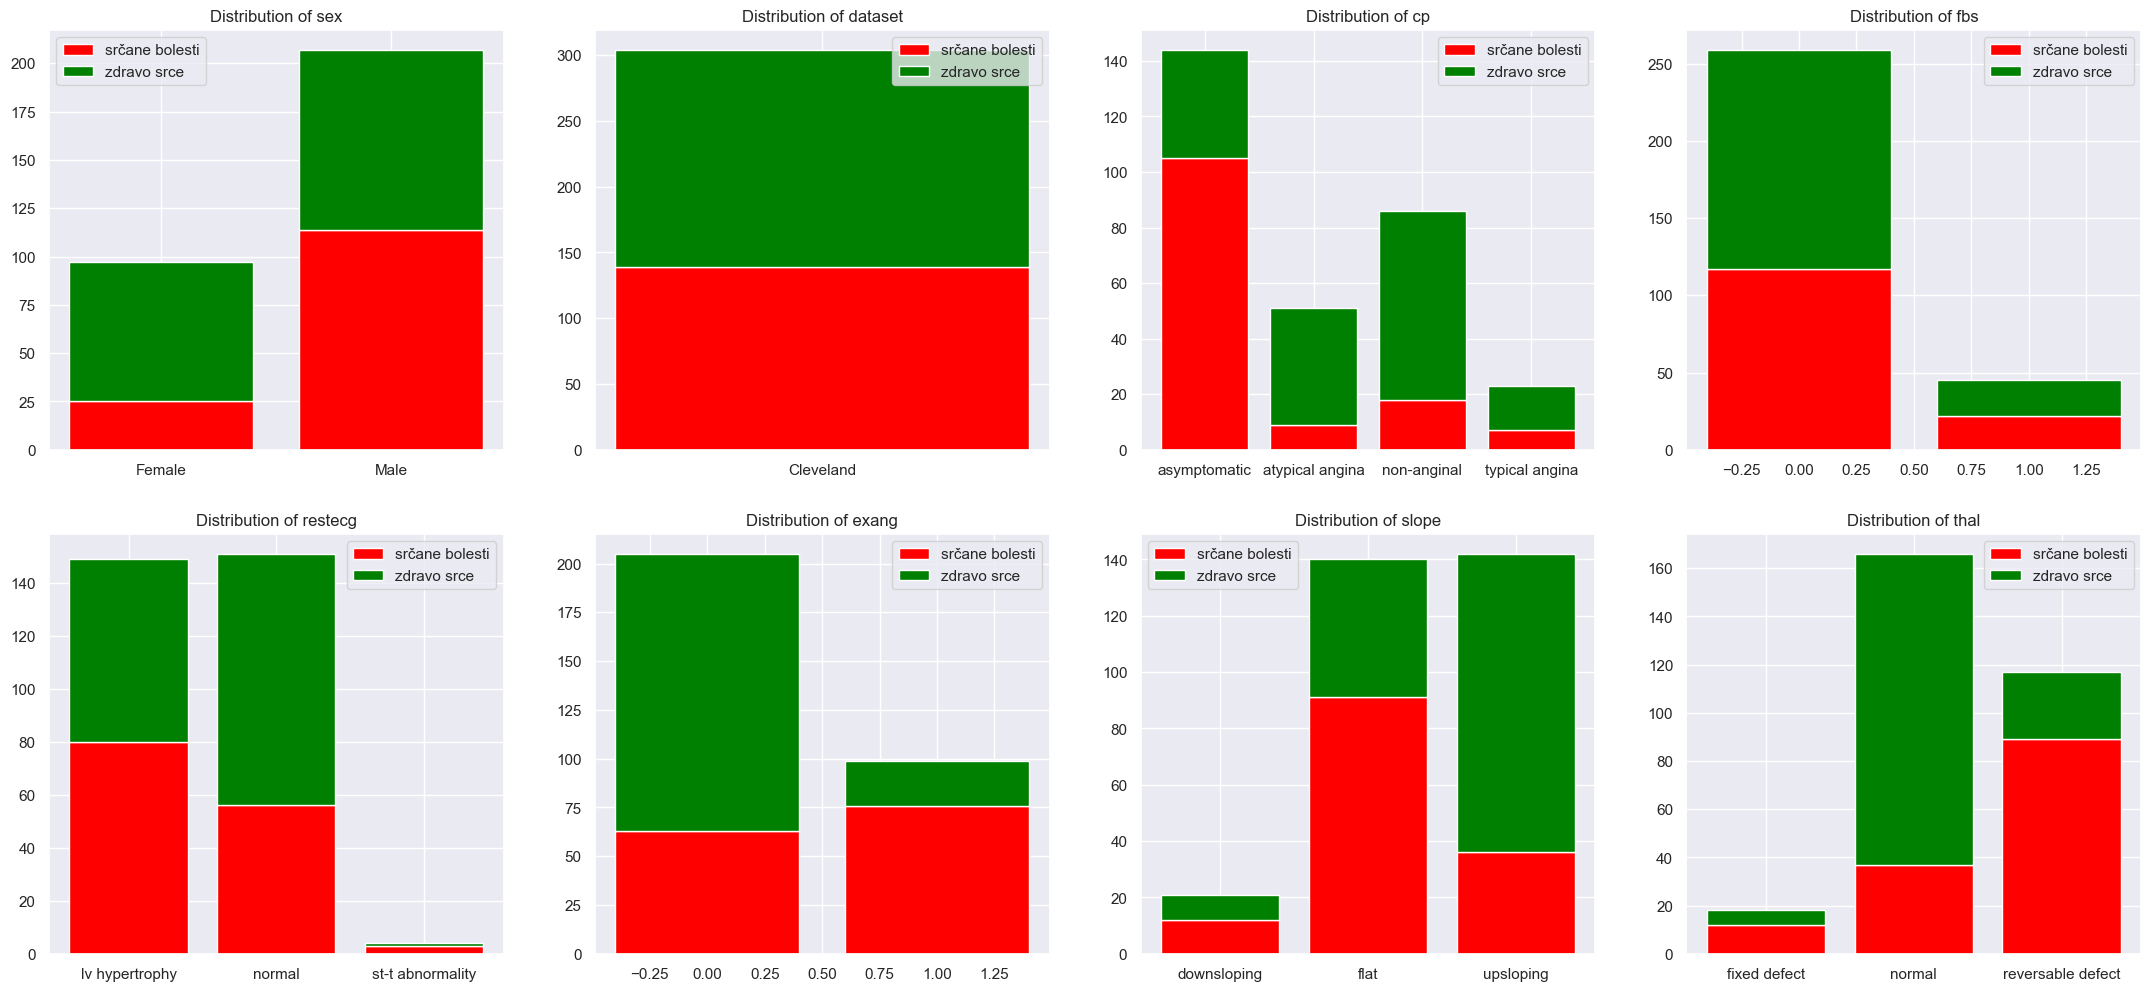

In [10]:
X = X[X['dataset'] == 'Cleveland']

X_categoric = X.loc[:, X.columns.isin(object_columns)]
fig, ax = plt.subplots(2, 4, figsize=(27, 12))
k = 0
for i in range(2):
    for j in range(4):
        
        column_name = X_categoric.columns[k]

        X_tmp_good = X.loc[X.num == 0].groupby(column_name).count().loc[:, "age"].values
        X_tmp_bad = X.loc[X.num > 0].groupby(column_name).count().loc[:, "age"].values
        spol = X.groupby(column_name).count().index.values
        
            
        ax[i, j].bar(spol, X_tmp_bad, color="red", label="srčane bolesti")
        ax[i, j].bar(spol, X_tmp_good, color="green", label="zdravo srce", bottom=X_tmp_bad)

        ax[i, j].set_title(f"Distribution of {column_name}") 
        ax[i, j].grid(True)
        ax[i, j].legend(loc='best')

        k += 1

plt.show()


Što nam ovi grafovi mogu sugerirati:

 - oko 50% populacija Clevelanda ima srčane bolesti, što je dobro za treniranje modela da imamo podjednak broj primjera

 - oko 60% muške populacije Clevelanda ima neku razinu srčane bolesti, dok je kod žena taj udio znatno manji oko 25%

 - asimptomatska bol u prsima najviše pogađa srčane bolesnike (bez drugih simptoma poput vrtoglavice ili mučnine)

 - razina šećera u krvi natašte nebi trebao imati veliki utjecaj na pouzdano određivanje srčanih bolesti obzirom da je udio zdravih i bolesnih u oba slučaja naizgled isti

 - st-t abnormalnost ne zahvaća velik dio uzorka, ali oni koji jesu zahvaćeni ukazuje na neku razinu srčane bolesti (st-t abnormalnosti često ukazuju na smanjen protok krvi u srčanom mišiću)

 - 75% srčanih bolesnika ima anginu kod vježbanja, dok 30% kod onih koji nemaju

 - 65% srčanih bolesnika ravan (flat) ST segment dok downsloping (koji je inače po internet izvorima ozbiljniji indikator) ima njih 50% 
 
 - gotovo 75% srčanih bolesnika ima "reversible defect" kod "thal" atributa, odnosno boli u prsima

Ove tvrdnje se ne mogu uzeti kao apsolutne. Značajnost i pouzdanost svake tvrdnje se može dodatno testirati testovima proporcija.


<h4>Odnos između numeričkih atributa</h4>

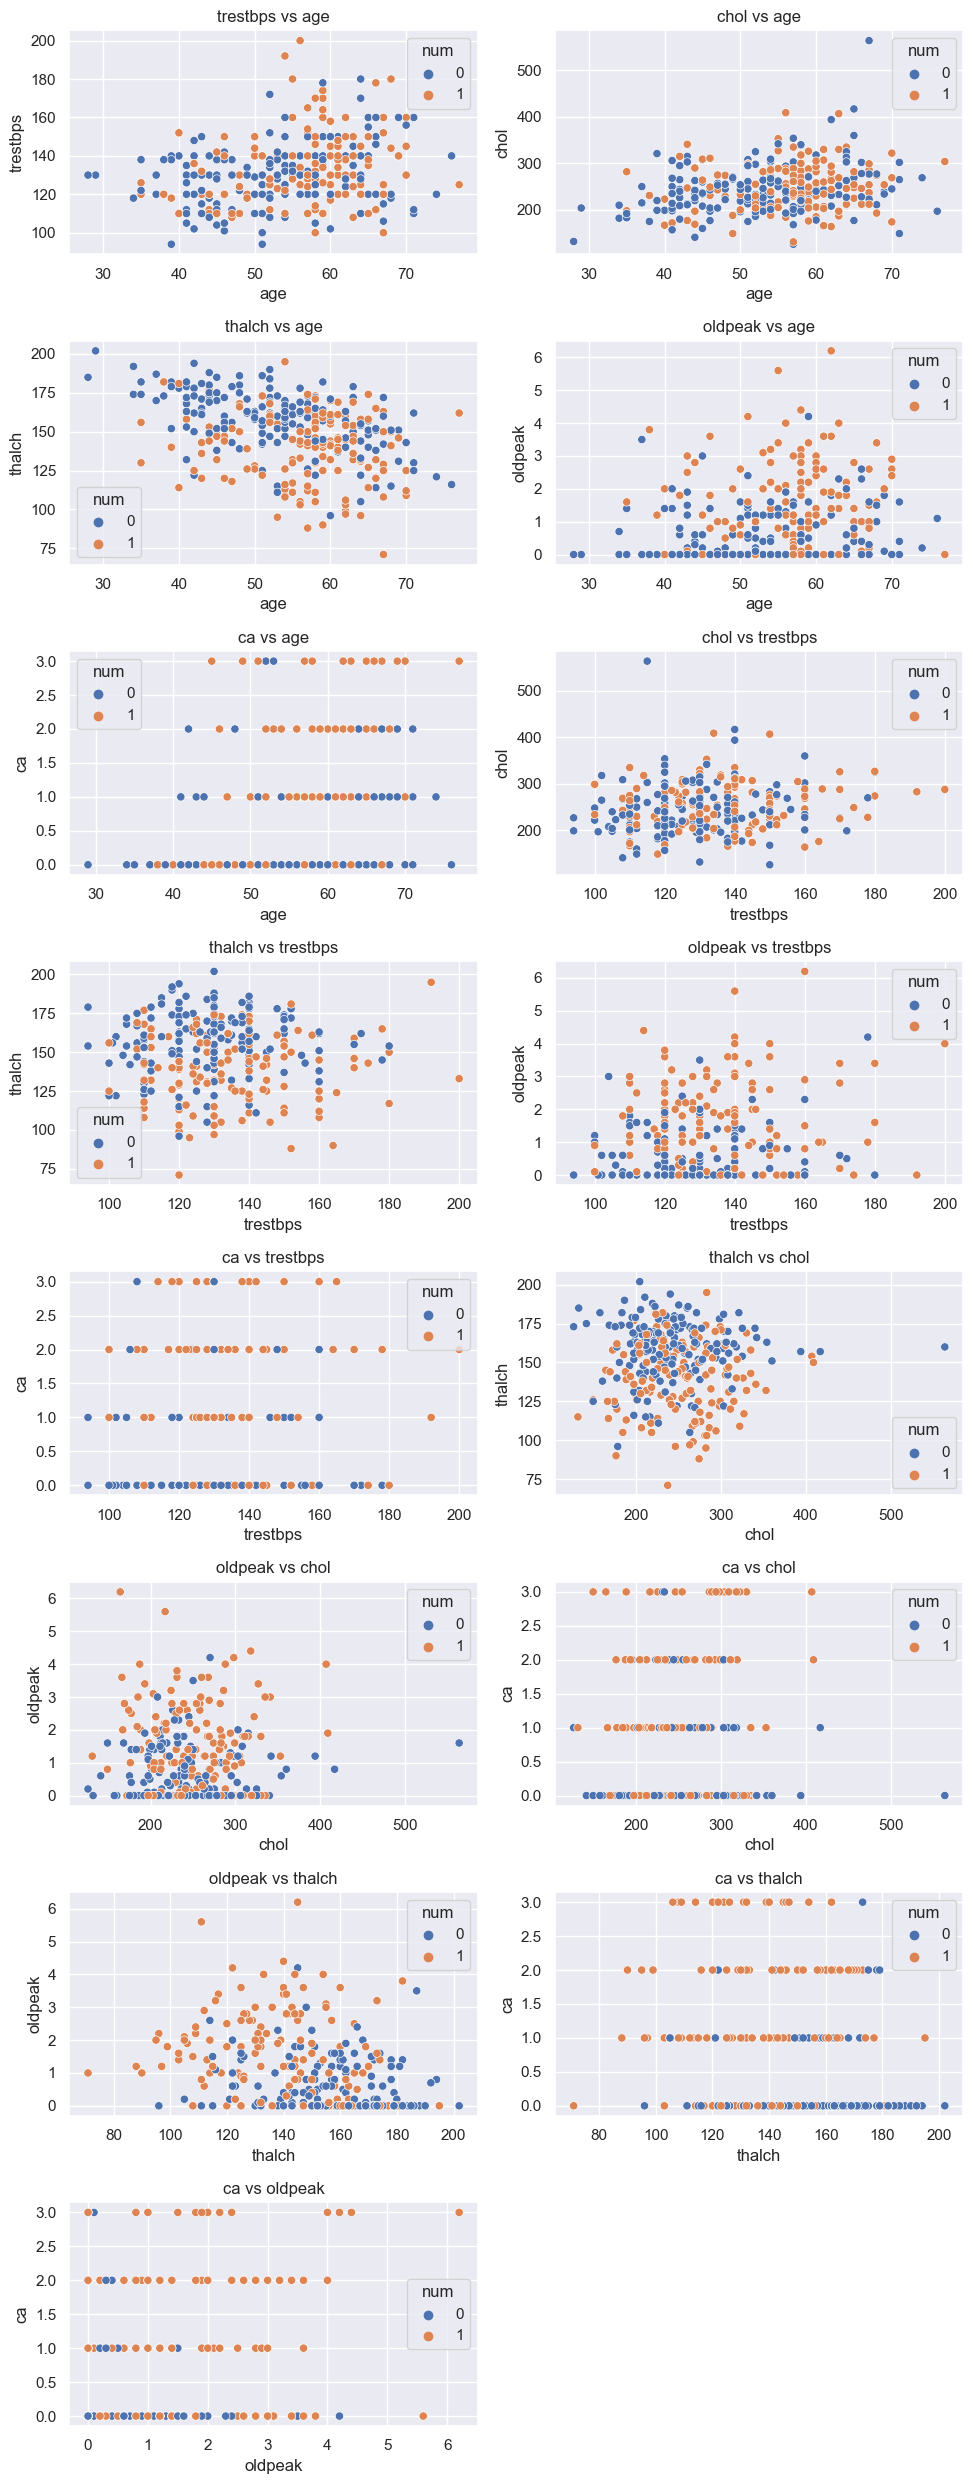

In [11]:
X_numeric = X.loc[:, ~X.columns.isin(object_columns)]
X_tmp_numeric = X_numeric.copy()

X_tmp_numeric.loc[X_tmp_numeric["num"] > 0, "num"] = 1
numeric_features = X_tmp_numeric.columns.values[:-1]

n = len(numeric_features)
valid_axes = [(i, j) for i in range(n-1) for j in range(i+1, n) if i != j and j > i]

num_rows = 8
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 25))

for idx, (i, j) in enumerate(valid_axes):
    if idx == 15:
        break
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=X_tmp_numeric, x=numeric_features[i], y=numeric_features[j], hue="num", ax=ax)
    ax.grid(True)
    ax.set_title(f"{numeric_features[j]} vs {numeric_features[i]}")

plt.tight_layout()
fig.delaxes(axes[7, 1])

plt.show()

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


Iz ovih grafova možemo saznati sljedeće:

- puno više pacijenta iznad 50 godina ima neku razinu srčanih bolesti
- ako  su 2 ili 3 arterije (ca) obojane dosta je izgledno da se radi o srčanoj bolesti
- ako je status depresije (oldpeak) veći od 1 znatno se povećava i broj srčanih bolesnika


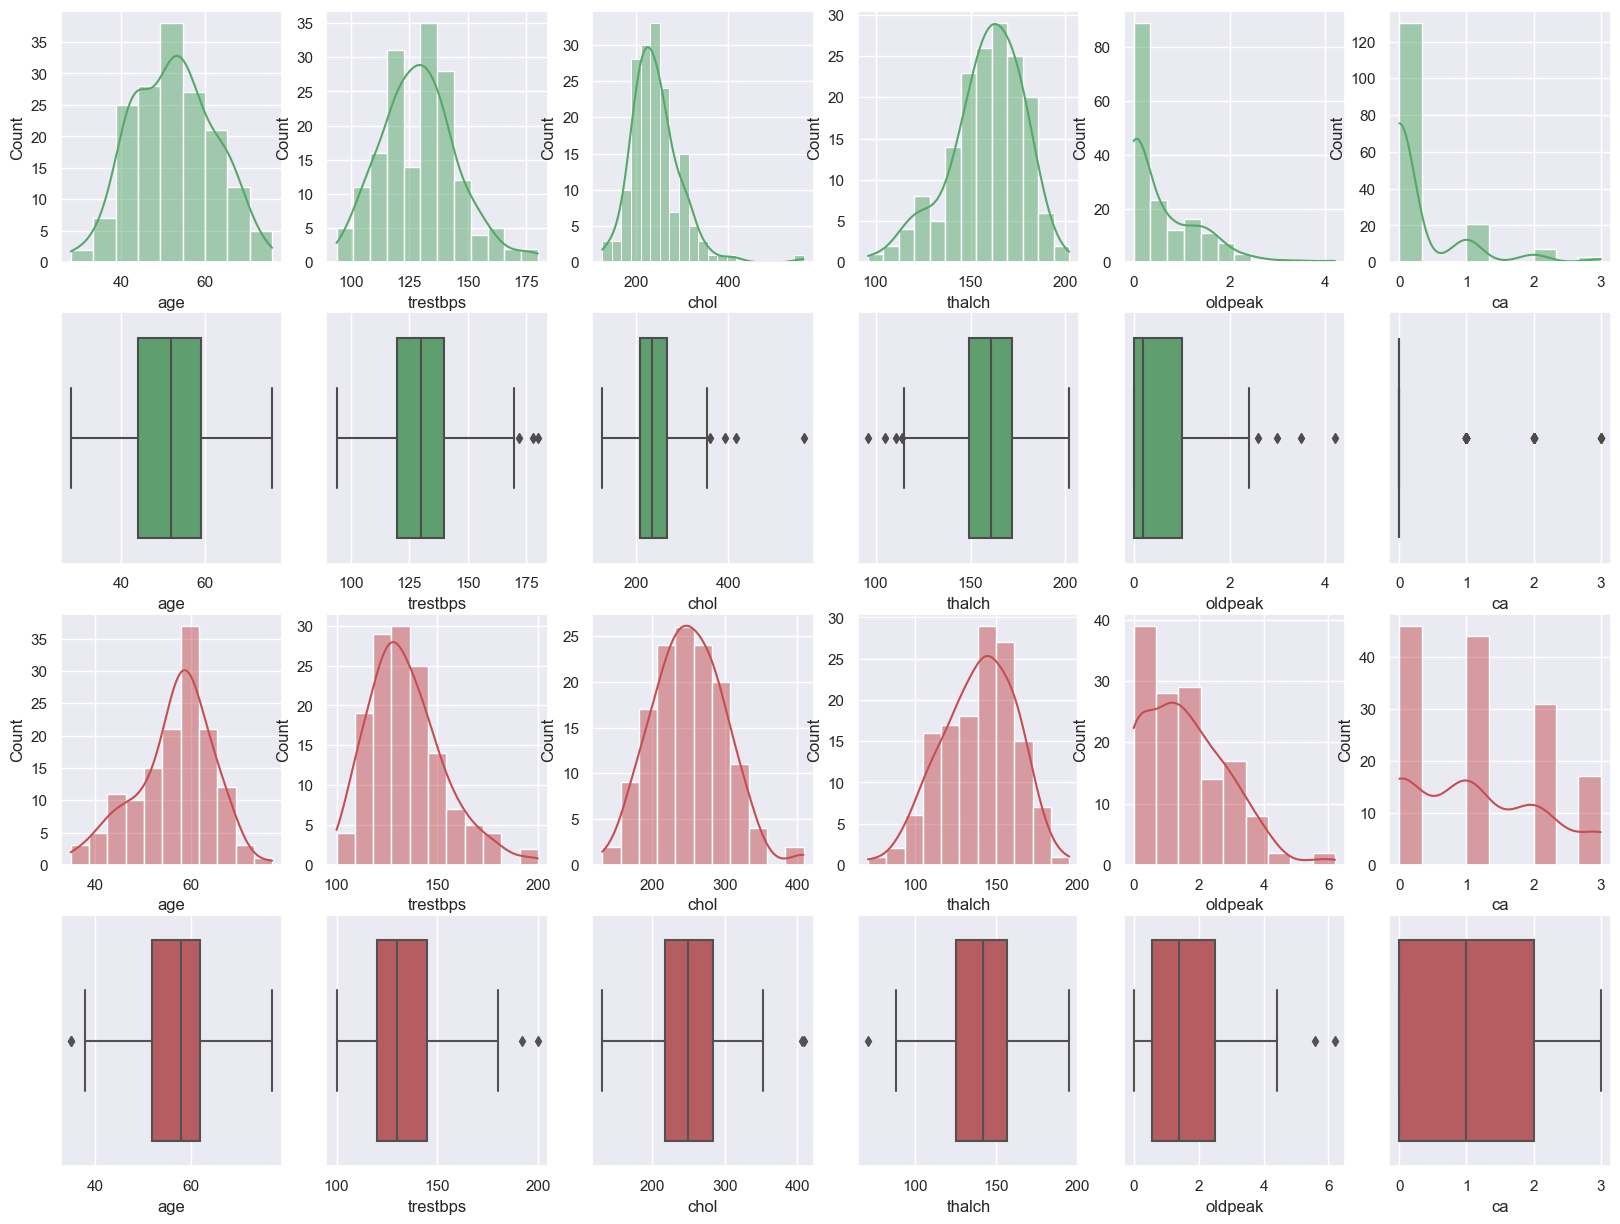

In [12]:
from scipy.stats import shapiro

X_tmp_numeric_good = X_tmp_numeric.loc[X.num == 0]
X_tmp_numeric_bad = X_tmp_numeric.loc[X.num > 0]
fig, axes = plt.subplots(4, len(numeric_features), figsize=(20, 15))
for i in range(4):
    for j in range(len(numeric_features)):
        ax = axes[i, j]
            
        if i == 0:
            sns.histplot(X_tmp_numeric_good[numeric_features[j]], kde=True, ax=ax, color="g")
        if i == 1:
            sns.boxplot(data=X_tmp_numeric_good, x=numeric_features[j], ax=ax, color="g") 
            
        if i == 2:
            sns.histplot(X_tmp_numeric_bad[numeric_features[j]], kde=True, ax=ax, color="r")
        if i == 3:
            sns.boxplot(data=X_tmp_numeric_bad, x=numeric_features[j], ax=ax, color="r") 


plt.show()
sns.reset_defaults()



<h4>Stršeće vrijednosti</h4>

Možemo primjetiti da svi atributi osim kod godina zdravih ljudi imaju stršeće vrijednosti.

Mi ih u ovom slučaju kao i autor članka nećemo maknuti. Razlog tomu je taj što trebamo imati veće domensko znanje kako bismo mogli s pouzdanošću maknuti stršeće vrijednosti jer one mogu bit posljedica prirodne pojave, a ne empirijske greške ili šuma.

Primjerice, postoje dobre i loše vrste kolesterola. Mi ovdje nemamo detalje o kojoj vrsti kolesterola je riječ, stoga nećemo maknut veliki outlier od 500 koji se nalazi kod zdravih ljudi.

In [13]:
X_tmp_numeric_bad_rounded = X_tmp_numeric_bad.describe().round()
X_tmp_numeric_good_rounded = X_tmp_numeric_good.describe().round()
difference_percent = 100 * (X_tmp_numeric_bad_rounded - X_tmp_numeric_good_rounded).round() / X_tmp_numeric_bad_rounded

print(X_tmp_numeric_bad_rounded)

print("\n")
print(X_tmp_numeric_good_rounded)

print("\nPercentage Difference between good and bad:")
print(difference_percent)

         age  trestbps   chol  thalch  oldpeak     ca    num
count  139.0     139.0  139.0   139.0    139.0  138.0  139.0
mean    57.0     135.0  251.0   139.0      2.0    1.0    1.0
std      8.0      19.0   49.0    23.0      1.0    1.0    0.0
min     35.0     100.0  131.0    71.0      0.0    0.0    1.0
25%     52.0     120.0  218.0   125.0      1.0    0.0    1.0
50%     58.0     130.0  249.0   142.0      1.0    1.0    1.0
75%     62.0     145.0  284.0   156.0      2.0    2.0    1.0
max     77.0     200.0  409.0   195.0      6.0    3.0    1.0


         age  trestbps   chol  thalch  oldpeak     ca    num
count  165.0     165.0  165.0   165.0    165.0  161.0  165.0
mean    52.0     129.0  242.0   159.0      1.0    0.0    0.0
std     10.0      16.0   54.0    19.0      1.0    1.0    0.0
min     28.0      94.0  126.0    96.0      0.0    0.0    0.0
25%     44.0     120.0  208.0   149.0      0.0    0.0    0.0
50%     52.0     130.0  234.0   161.0      0.0    0.0    0.0
75%     59.0     140.0

Na temelju gore histograma i pripadajućih boxplota, zajedno s tablicom razlike statističkih vrijednosti možemo saznati sljedeće:

- age: u prosjeku starije osobe su sklonije srčanim bolestima, minimalna starost srčanog bolesnika je 7 godina veća od minimalne vrijednosti zdrave osobe, a ta razlika (uz relativno malu razliku odstupanja između distribucija) je veća od prosječne razlike dobi

- trestbps: kod krvnog tlaka, distribucija srčanih bolesnika ima u prosjeku veći mirujući krvni tlak kao i varijabilnost, ali i outliere. Obzirom da se ne radi o centralnoj distribuciji, a prosjeci su jako osjetljivi na stršeće vrijednosti, u ovom slučaju medijan je bolja mjera centralnosti, a za ovaj slučaj je ista. Ono što jedino možemo s određenom pouzdanošću tvrditi je to da će srčani bolesnici imati znatno veća odstupanja od prosjeka

- chol: ako usporedimo medijan prvog  (bolja mjera jer nije centralna distribucija) i prosjek drugog (to možemo jer u drugom slučaju medijan odgovara prosjeku zato što se radi o centralnoj distribuciji) vidimo da srčani bolesnici imaju veći kolesterol. Treba dodatno razmotriti što se događa sa stršećim vrijednostima kao i većom varijabilnošću kod kolesterola zdravih ljudi
Valja uzeti u obzir da je relativna promjena tih vrijednosti mala

- thalch: veći znatno medijan imaju zdravi pacijenti u odnosu na nezdrave, kao i cijeli IQR

- odlpeak: prosjek kao i medijan je za 1 pomaknut u desno, a uz istu varijabilnost znači da u prosjeku srčani bolesnici će imati veće vrijednosti oldpeaka

- ca: kao i za oldpeak, isto vrijedi i za ca samo što je u pitanju diskretna distribucija. U tom slučaju, možemo vidjeti da puno više srčanih bolesnika ima vrijednosti ca >=1

Idemo provesti statističko testiranje kako bismo utvrdili pouzdanost ovih tvrdnji:

<h4>Homoskedastičnost</h4>

In [14]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy import stats
gauss_check = []



for i in range(len(numeric_features)-1):
    stat, p = stats.levene(X_tmp_numeric_good[numeric_features[i]], X_tmp_numeric_bad[numeric_features[i]])
    gauss_check.append({numeric_features[i]: p})

gauss_check

[{'age': 0.0035318257000187224},
 {'trestbps': 0.1417760060017809},
 {'chol': 0.7771663407879495},
 {'thalch': 0.024987927000416205},
 {'oldpeak': 1.796644094243667e-08}]

Uvjet iste varijance grupa je ostvarena samo kod kolesterola i mirujućeg krvnog tlaka.

<h4>Normalnost</h4>

In [15]:
gauss_check_good = []
gauss_check_bad = []



for i in range(len(numeric_features)-1):
    stat, p = shapiro(X_tmp_numeric_good[numeric_features[i]])
    gauss_check_good.append({numeric_features[i]: p})

    stat, p = shapiro(X_tmp_numeric_bad[numeric_features[i]])
    gauss_check_bad.append({numeric_features[i]: p})


gauss_check_good, gauss_check_bad

([{'age': 0.23810459673404694},
  {'trestbps': 0.010528828017413616},
  {'chol': 5.495849997316782e-09},
  {'thalch': 0.0005361537914723158},
  {'oldpeak': 7.917396528970763e-15}],
 [{'age': 0.002255581319332123},
  {'trestbps': 0.00011726607044693083},
  {'chol': 0.40250614285469055},
  {'thalch': 0.3523006737232208},
  {'oldpeak': 2.3386103293887572e-06}])

Normalne distribucije kod zdravih pacijenata: dob

Normalne distribucije kod srčanih bolesnika: kolesterol i thalch

<h4>T-test</h4>

In [16]:
gauss_check = []
from scipy.stats import mannwhitneyu



for i in range(len(numeric_features)-1):
    stat, p = stats.ttest_ind(X_tmp_numeric_good[numeric_features[i]], X_tmp_numeric_bad[numeric_features[i]])
    gauss_check.append({numeric_features[i]: p})

gauss_check

[{'age': 5.8111495549848545e-05},
 {'trestbps': 0.008404480862122001},
 {'chol': 0.11324855513729683},
 {'thalch': 2.142445440468379e-14},
 {'oldpeak': 7.743511486560228e-15}]

Da bi t-test bio valjan mora zadovoljiti 3 uvjeta:
- normalnost grupa
- jednakost varijanci
- neovisnost uzoraka

Vidimo da ne postoji statistički značajna razlika između prosjeka kolesterola kod srčanih i zdravih pacijenata. Za ostale atribute postoji statistički značajna razlika, no potrebno je još detaljnije provjeriti obzirom da nisu pretpostavke t-testa ispunjene.

<h3>Čišćenje podataka</h3>

<h4>Nedostajuće vrijednosti</h4>

In [17]:
X[X['dataset'] == "Cleveland"].isna().sum()


age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
dtype: int64

Imamo 5 nedostajućih vrijednosti za ca. Obzirom da se radi o numeričkom atributu, nadopuniti ćemo ih prosječnom ca vrijednošću. Ostale kategoričke atribute koji imaju nedostajuće vrijednosti ćemo ukloniti jer čine 1% skupa podataka, što nije značajno.

In [18]:
X_numeric.loc[X_numeric.ca.isna(), "ca"] = X_numeric.loc[:, "ca"].mean().round()

In [19]:
X_categoric = X_categoric.drop("dataset", axis=1)
X_categoric = X_categoric.loc[X_categoric.slope.notnull(), :]
X_categoric = X_categoric.loc[X_categoric.thal.notnull(), :]

In [20]:
X_categoric.isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64

Sada su nam podaci počišćeni i spremi za ulazak u model.

<h2>Replikacija rezultata</h2>

Kao i u istraživanju istrenirati ćemo 5 različitih modela, evaluirati, usporediti s rezultatima iz članka i objasniti eventualne razlike.


In [21]:
object_columns = X_categoric.select_dtypes("object").columns.values
le = LabelEncoder()
X_data_categoric = X_categoric.copy()
for feature in object_columns:
    X_data_categoric[feature] = le.fit_transform(X_categoric[feature])

In [22]:
X_data = pd.merge(X_data_categoric, X_numeric, how="inner", on="id")
X_data


,sex,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalch,oldpeak,ca,num
id,,,,,,,,,,,,,,
1,1,3,1,0,0,0,0,63,145.0,233.0,150.0,2.3,0.0,0
2,1,0,0,0,1,1,1,67,160.0,286.0,108.0,1.5,3.0,1
3,1,0,0,0,1,1,2,67,120.0,229.0,129.0,2.6,2.0,1
4,1,2,0,1,0,0,1,37,130.0,250.0,187.0,3.5,0.0,0
5,0,1,0,0,0,2,1,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1,3,0,1,0,1,2,45,110.0,264.0,132.0,1.2,0.0,1
300,1,0,1,1,0,1,2,68,144.0,193.0,141.0,3.4,2.0,1
301,1,0,0,1,1,1,2,57,130.0,131.0,115.0,1.2,1.0,1


In [23]:
y_data = X_data.loc[:, "num"]
X_data = X_data.loc[:, X_data.columns != "num"]


¸Za svaki model koristiti ćemo k-fold-cross-validation operator koji služi poboljšanju preciznosti rezultata na način da dijeli skup podataka u k jednako velikih podskupova koji onda idu u fazu treniranje i testiranja.

In [61]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, train_size=0.8, random_state=55)


In [337]:

def find_hyperparameters(parameter_list, model, hyperparameter_name, scaled, dim_increase):
    accuracy_list_train = []
    accuracy_list_val = []
    
    if scaled and dim_increase == 0:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
    elif dim_increase > 1:
        scaler = StandardScaler()
        poly = PolynomialFeatures(dim_increase)
        train_X1 = poly.fit_transform(X_train)
        val_X1 = poly.transform(X_val)
        
        X_train_scaled = scaler.fit_transform(train_X1)
        X_val_scaled = scaler.transform(val_X1)
        
    else:
        X_train_scaled = X_train
        X_val_scaled = X_val
        


    for param_value in parameter_list:
        params = {hyperparameter_name: param_value}
        
        model_instance = model(**params)
        

        model_instance.fit(X_train_scaled, y_train)
        
        predictions_train = model_instance.predict(X_train_scaled)
        predictions_val = model_instance.predict(X_val_scaled)

        accuracy_train = accuracy_score(y_true=y_train, y_pred=predictions_train)
        accuracy_val = accuracy_score(y_true=y_val, y_pred=predictions_val)

        accuracy_list_train.append(accuracy_train)
        accuracy_list_val.append(accuracy_val)

    plt.title(f'Train x Validation metrics ({hyperparameter_name})')
    plt.xlabel(hyperparameter_name.capitalize() + ' Values')
    plt.ylabel('Accuracy')
    plt.xticks(ticks=range(len(parameter_list)), labels=parameter_list)
    plt.plot(accuracy_list_train)
    plt.plot(accuracy_list_val)
    plt.legend(['Train', 'Validation'])
    plt.show()


In [207]:
def print_metrics(y_pred):
    print(classification_report(y_train,y_pred))
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    overall_conf_matrix = confusion_matrix(y_train, y_pred)
    
    ConfusionMatrixDisplay(confusion_matrix=overall_conf_matrix).plot(cmap=plt.cm.Blues, values_format='d', ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)

    axes[1].plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')

    
    plt.show()
    

In [209]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import cross_val_predict

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")



<h3>1) Logistička regresija</h3>

In [271]:
degrees = [1,2, 3, 4]
alphas = [float("Inf"), 1.5, 1.0, 0.1, 0.01]


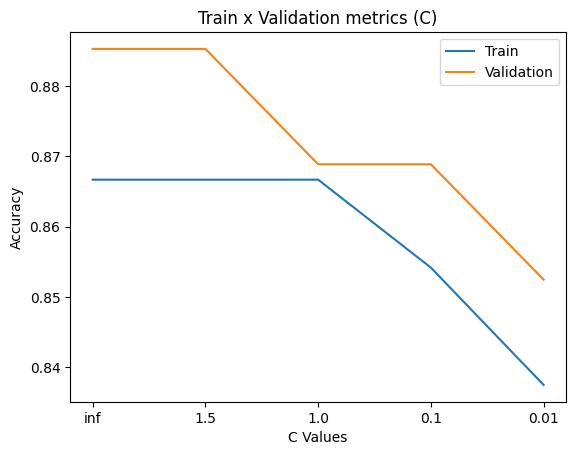

In [185]:
find_hyperparameters(model=LogisticRegression, parameter_list=alphas, hyperparameter_name="C", dim_increase=0, scaled=True)

In [187]:
model_lr = LogisticRegression(max_iter=10000)
y_pred = cross_val_predict(model_lr, X_train, y_train, cv=stratified_kfold)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       126
           1       0.84      0.75      0.80       114

    accuracy                           0.82       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.82      0.82      0.82       240



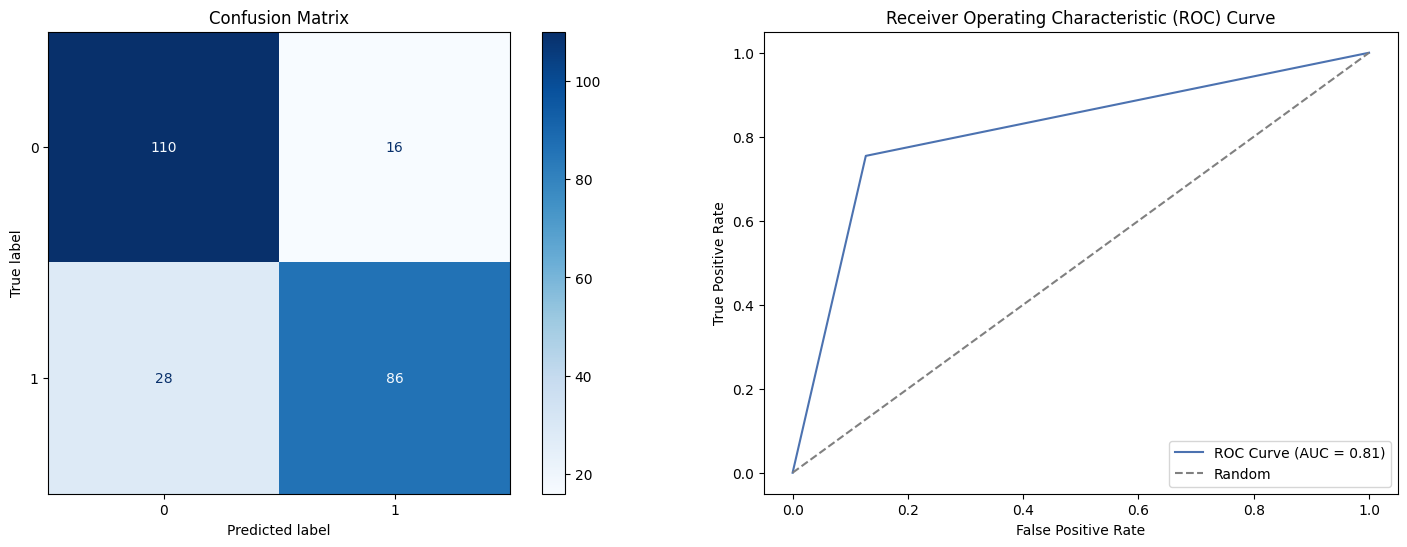

In [208]:
print_metrics(y_pred)

<h3>2) SVM</h3>

In [293]:
from sklearn.svm import SVC

kernels =['linear', 'rbf', 'poly', 'sigmoid']
C =[0.1, 1, 10, 50, 100]



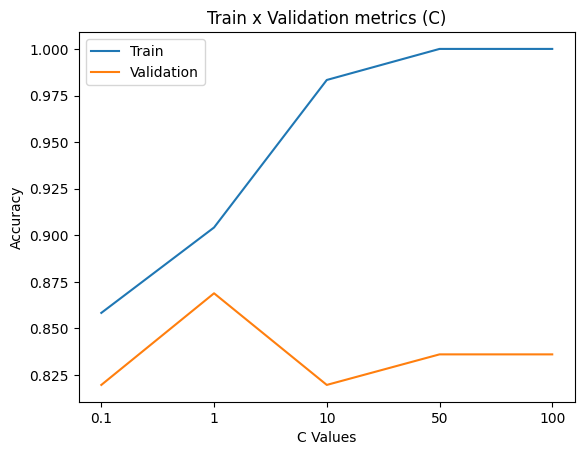

In [338]:
find_hyperparameters(model=SVC, parameter_list=C, hyperparameter_name="C", dim_increase=0, scaled=True)


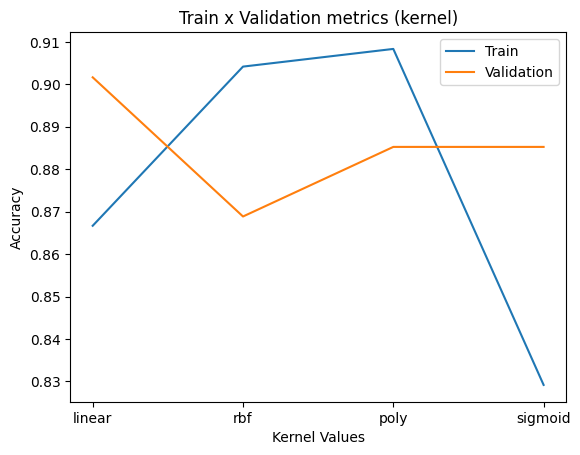

In [230]:
find_hyperparameters(model=SVC, parameter_list=kernels, hyperparameter_name="kernel", dim_increase=0, scaled=True)

In [231]:
X_train_scaled = scaler.fit_transform(X_train)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
y_pred = cross_val_predict(svm_model, X_train_scaled, y_train, cv=stratified_kfold)



              precision    recall  f1-score   support

           0       0.80      0.88      0.84       126
           1       0.85      0.76      0.81       114

    accuracy                           0.82       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.82      0.82       240



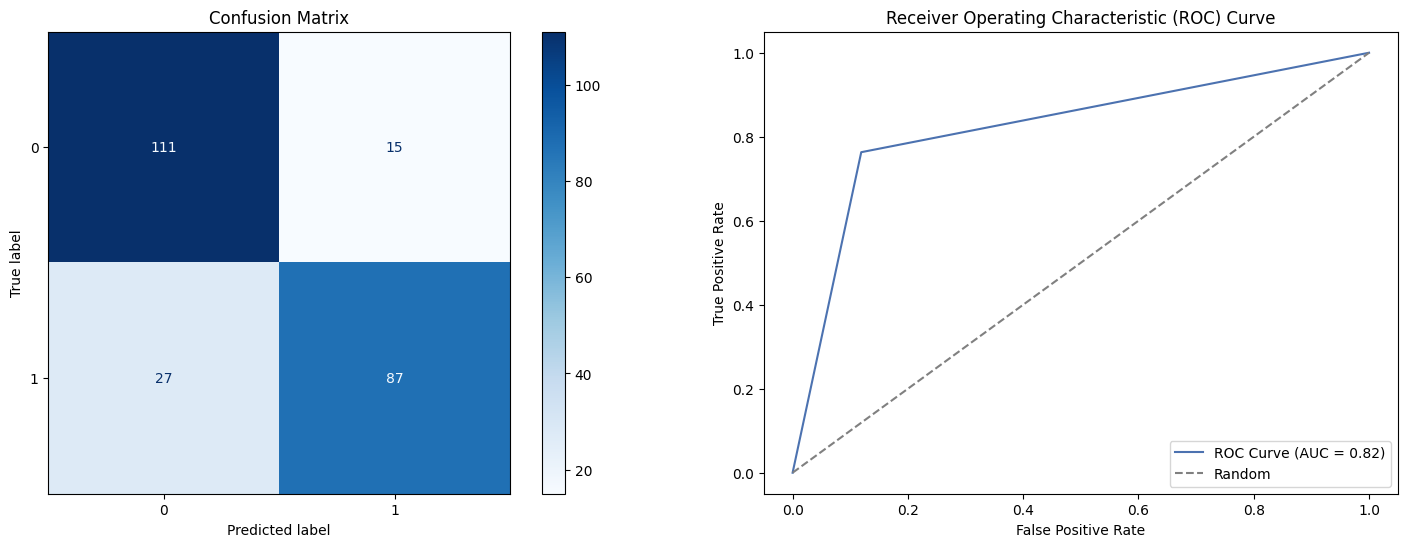

In [232]:
print_metrics(y_pred)

<h3>3) Naive Bayes</h3>

In [257]:
from sklearn.naive_bayes import GaussianNB
var_smoothing_list = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]



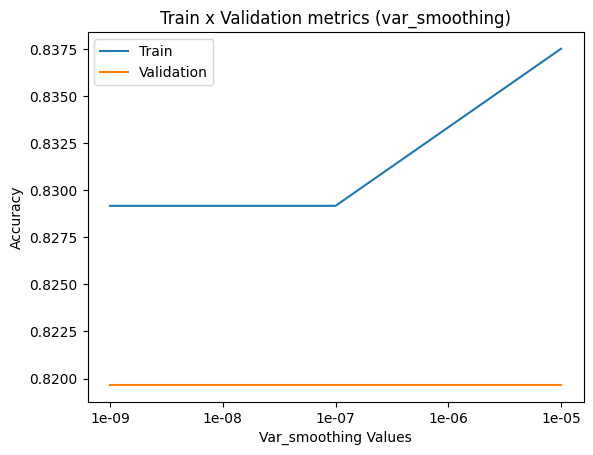

In [268]:
find_hyperparameters(model=GaussianNB, parameter_list=var_smoothing_list, hyperparameter_name="var_smoothing", dim_increase=0, scaled=False)


In [269]:
nb_model = GaussianNB()
y_pred = cross_val_predict(nb_model, X_train, y_train, cv=stratified_kfold)


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       126
           1       0.83      0.79      0.81       114

    accuracy                           0.82       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.82      0.82       240



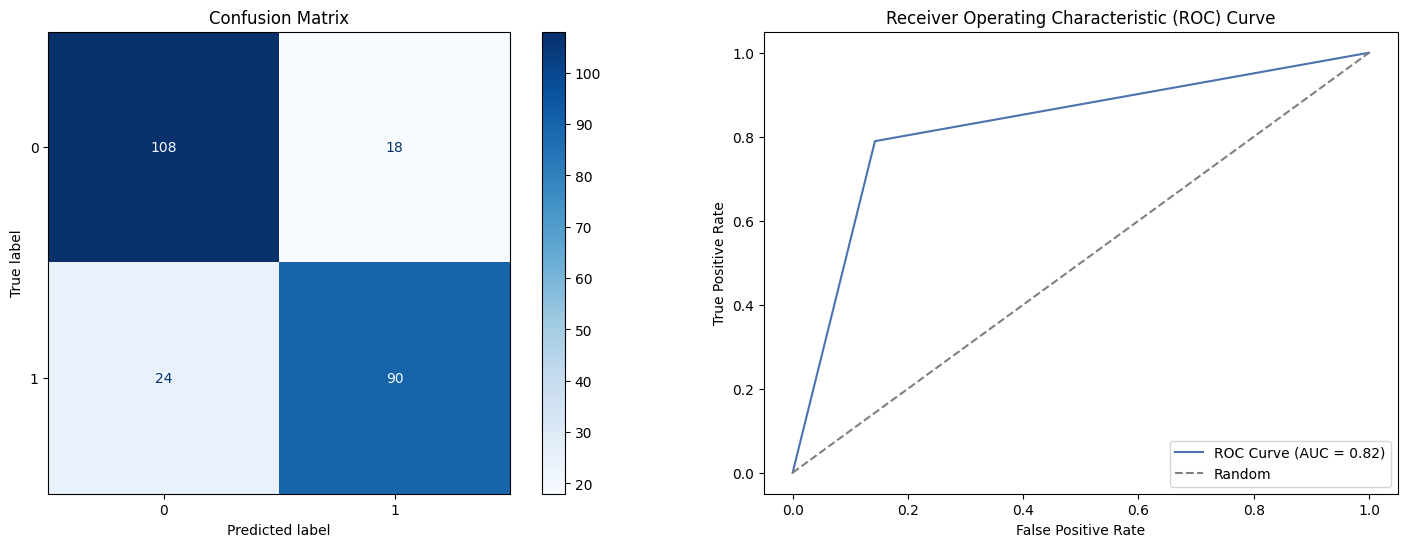

In [270]:
print_metrics(y_pred)

<h3>4) Decision Tree</h3>

In [237]:
from sklearn.tree import DecisionTreeClassifier
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 


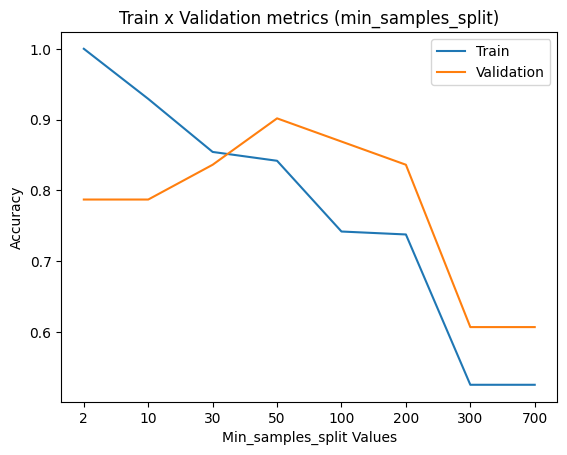

In [250]:
find_hyperparameters(model=DecisionTreeClassifier, parameter_list=min_samples_split_list, hyperparameter_name="min_samples_split", dim_increase=0, scaled=False )


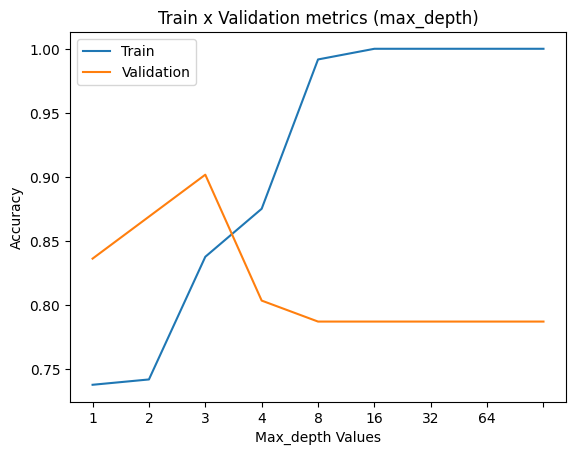

In [238]:
find_hyperparameters(model=DecisionTreeClassifier, parameter_list=max_depth_list, hyperparameter_name="max_depth", dim_increase=0, scaled=False )


In [126]:
from sklearn.model_selection import GridSearchCV


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2, 3, 4, 8, 16, 32, 64, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

predictions_dt = best_model_dt.predict(X_val)
accuracy_dt = accuracy_score(y_true=y_val, y_pred=predictions_dt)

print("Best Parameters for Decision Tree:", best_params_dt)
print("Accuracy on Test Set:", accuracy_dt)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy on Test Set: 0.819672131147541


In [244]:
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=50)
y_pred = cross_val_predict(dt_model, X_train, y_train, cv=stratified_kfold)


              precision    recall  f1-score   support

           0       0.66      0.80      0.73       126
           1       0.72      0.55      0.62       114

    accuracy                           0.68       240
   macro avg       0.69      0.68      0.68       240
weighted avg       0.69      0.68      0.68       240



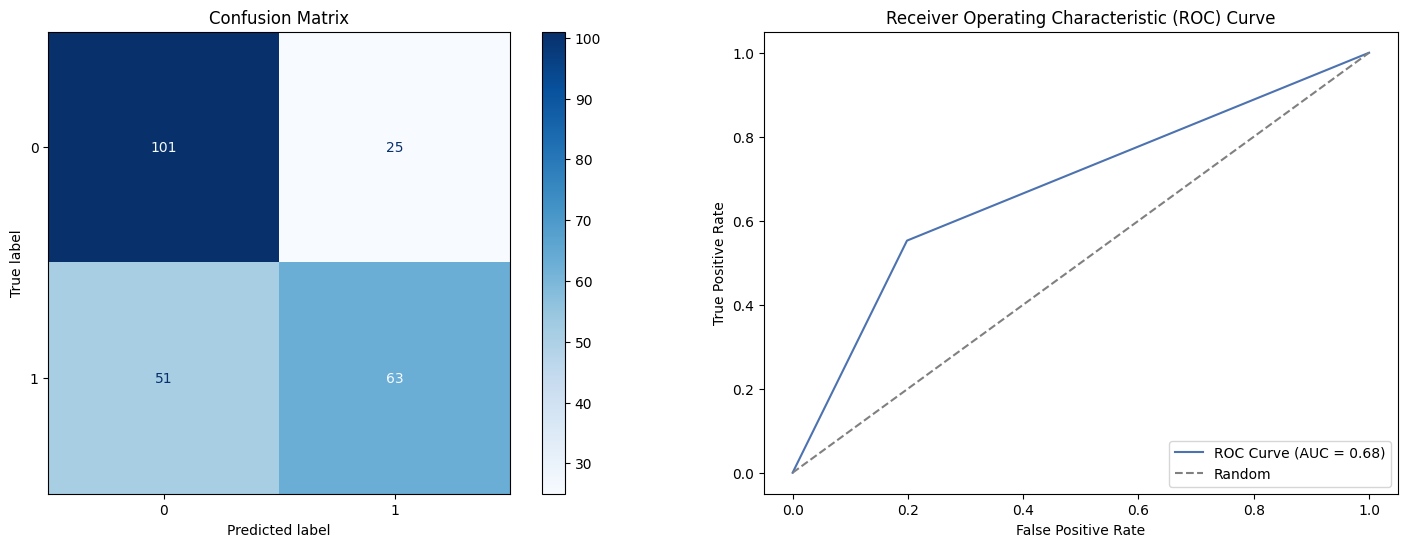

In [245]:
print_metrics(y_pred)

<h3>5) Random Forest</h3>

In [246]:
from sklearn.ensemble import RandomForestClassifier
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500] #number of decision trees in random forest

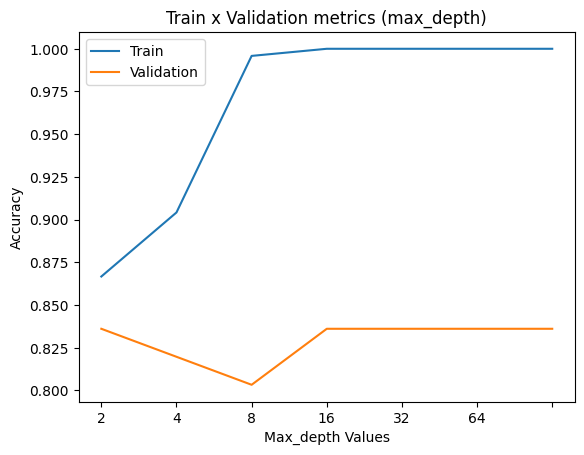

In [247]:
find_hyperparameters(model=RandomForestClassifier, parameter_list=max_depth_list, hyperparameter_name="max_depth", dim_increase=0, scaled=False )


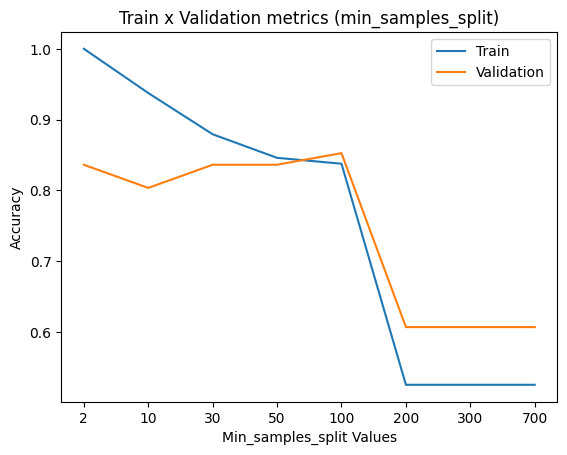

In [251]:
find_hyperparameters(model=RandomForestClassifier, parameter_list=min_samples_split_list, hyperparameter_name="min_samples_split", dim_increase=0, scaled=False )


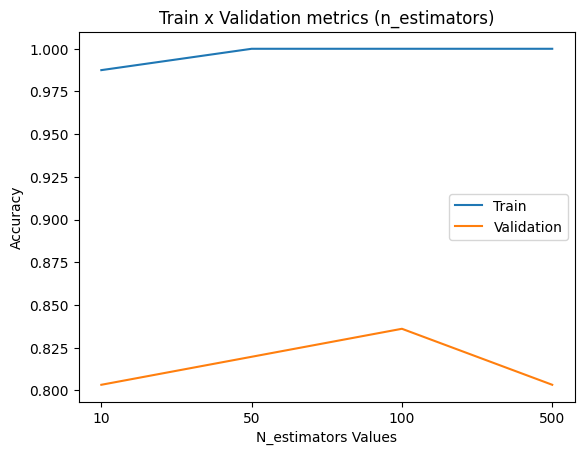

In [253]:
find_hyperparameters(model=RandomForestClassifier, parameter_list=n_estimators_list, hyperparameter_name="n_estimators", dim_increase=0, scaled=False )


In [254]:
rf_model = RandomForestClassifier(random_state=42, min_samples_split=10, n_estimators=100, max_depth=16)
y_pred = cross_val_predict(rf_model, X_train, y_train, cv=stratified_kfold)



              precision    recall  f1-score   support

           0       0.77      0.84      0.81       126
           1       0.81      0.73      0.76       114

    accuracy                           0.79       240
   macro avg       0.79      0.78      0.79       240
weighted avg       0.79      0.79      0.79       240



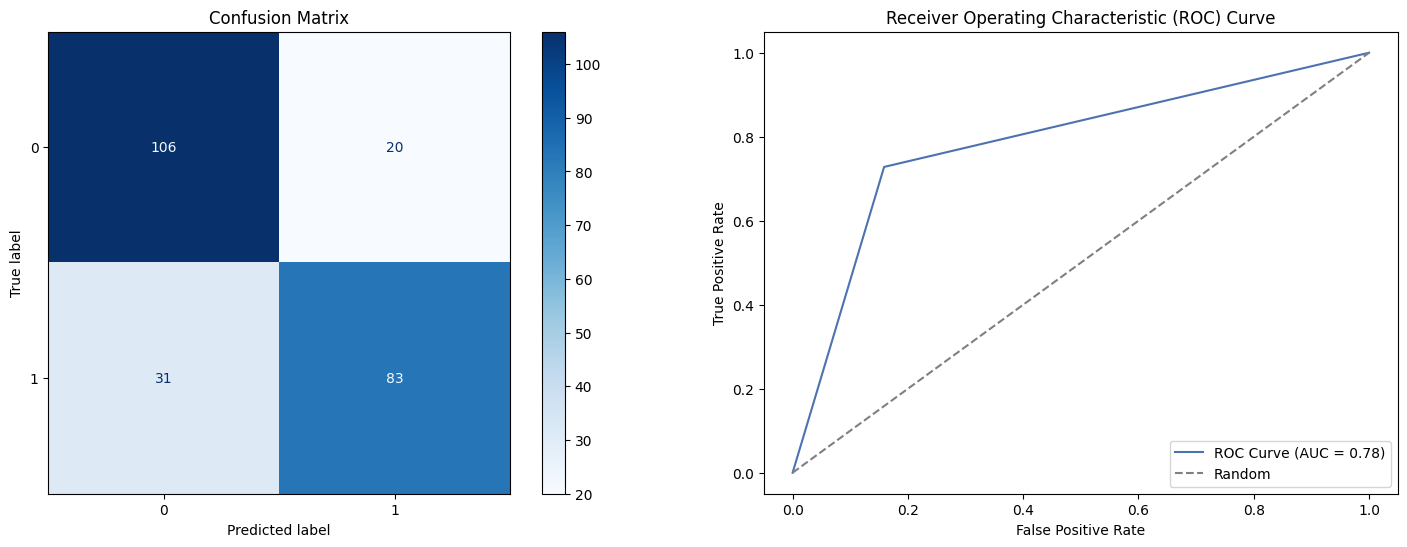

In [255]:
print_metrics(y_pred)